Classical random walk in python

Text(0, 0.5, 'probability')

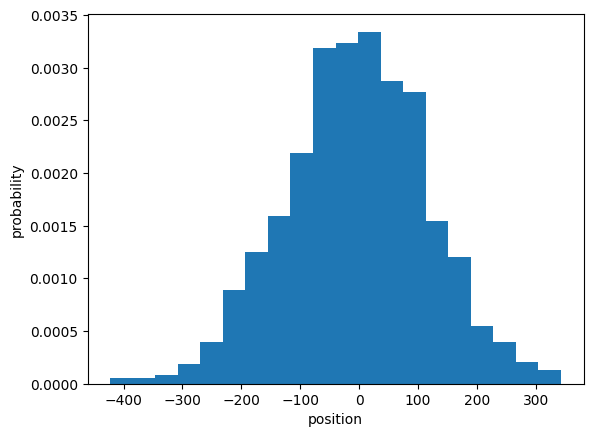

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

n_steps = 15000 # Essentially time
step_prob = 0.5 # Can step left or right equally
n_sim = 1000 #Perform the random walk 1000 times
#Make a new position vector. This will include all simulations
position = np.zeros((n_sim, n_steps))
#Loop through each simulation
for i in range(n_sim):
    #Loop through each step
    for j in range(1, n_steps):
        # Flip a coin.
        flip = np.random.rand()
        # Figure out how to step
        if flip < step_prob:
            step = -1
        else:
            step = 1
        # Update our position
        position[i, j] = position[i, j-1] + step

#plot
plt.hist(position[:, -1], bins=20, density=True)
plt.xlabel('position')
plt.ylabel('probability')

Quantum random walk in python

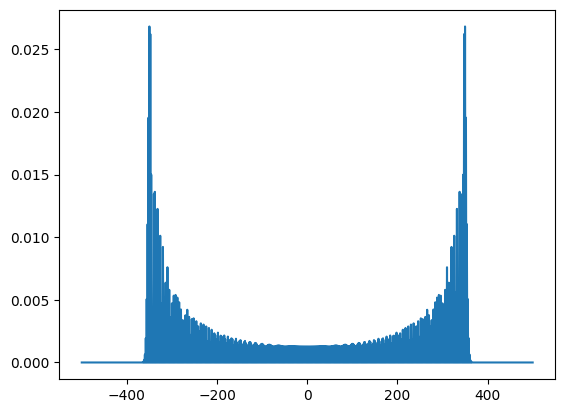

In [2]:
import math
import pylab

def probabilities(posn): #returns a list of the probabilies for each place
    return [sum([abs(amp)**2 for amp in place]) for place in posn]
def normalise(posn): #normalise function to normalise an input 1D line
    N = math.sqrt(sum(probabilities(posn)))
    return [[amp / N for amp in place] for place in posn]
def timestep(posn): #defines action of a timestep, i.e. a Hadamard gate on each element
    return normalise([[x[0]+x[1], x[0]-x[1]] for x in posn])
def shift(coin): #shift the up elements leftwards and the down elements rightwards
    newposn = [[0, 0] for i in range(len(coin))]
    for j in range(1, len(posn)-1):
        newposn[j+1][0] += coin[j][0]
        newposn[j-1][1] += coin[j][1]
    return normalise(newposn)
#initialise lists
min, max = -500, 501
posn = [[0, 0] for i in range(min, max)]
posn[-min] = [1 / math.sqrt(2), 1j / math.sqrt(2)]
#run for some steps
for time in range(-min):
    posn = shift(timestep(posn))

#plot
pylab.plot(range(min, max), probabilities(posn))
pylab.show()

Quantum random walk in Qiskit

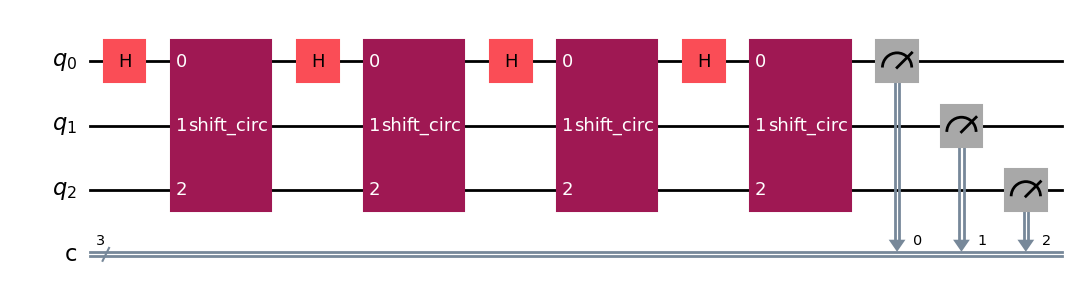

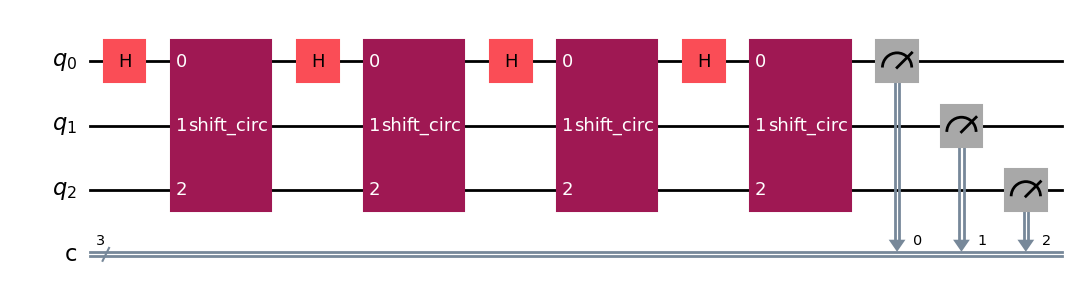

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator

n_steps = 4 #number of steps
#defining the shift gate
shift_q = QuantumRegister(3) #3 qubit register
shift_circ = QuantumCircuit(shift_q, name='shift_circ') #circuit for shift operator
shift_circ.ccx(shift_q[0],shift_q[1], shift_q[2]) #toffoli gate
shift_circ.cx(shift_q[0],shift_q[1]) #CNOT gate
shift_circ.x(shift_q[0])
shift_circ.x(shift_q[1])
shift_circ.ccx(shift_q[0],shift_q[1], shift_q[2])
shift_circ.x(shift_q[1])
shift_circ.cx(shift_q[0],shift_q[1])
shift_gate = shift_circ.to_instruction() #convert the circuit to a gate
q = QuantumRegister(3,name='q') #3 qubit register
c = ClassicalRegister(3,name='c') #3 bit classical register
circ = QuantumCircuit(q,c) #main circuit
for i in range(n_steps):
    circ.h(q[0]) #coin step
    circ.append(shift_gate, [q[0],q[1],q[2]]) #shift step
circ.measure ([q[0],q[1],q[2]], [c[0],c[1],c[2]])
circ.draw("mpl")

#ลองทำวงจรเส้นตรง 10 qubit แล้วค่อยไปทำเป็นวงกลม 4 bit

In [4]:
from qiskit.visualization import plot_histogram

def plot_results(circ: QuantumCircuit):
    simulator = AerSimulator()
    results = simulator.run(circ,simulator, shots=1000).result()
counts = circ.results().get_counts(0)

plt.hist(counts)

AttributeError: 'QuantumCircuit' object has no attribute 'results'